In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [5]:
def pos(x,y):
    return np.array([x,y])

# Orbit

In [ ]:
def leap_kdk(G,Ms,Me,r,v,tm,dt):

    vl = []
    rmagl=[]
    rs2=0.3
    rx = []
    ry=[]
    vx=[]
    vy=[]
    vmagl = []
    
    time = []
    energy = []
    
    rm0=np.linalg.norm(r/1.496e11)
    rx.append(r[0])
    ry.append(r[1])
    vx.append(v[0])
    vy.append(v[1])
    print(r)
    
    #f = -G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
    f = -G*Ms*(r)/np.power(  1.496e11*np.sqrt(np.dot(r/1.496e11,r/1.496e11) + rs2) ,3.0)
    angl = []
    for i in np.arange(0,tm,dt):

        
        v[0] +=   dt*(f[0])*0.5
        v[1] +=  (f[1])*dt*0.5
       
        
        
        r[0] += (v[0])*dt
        r[1] += (v[1])*dt
        r = pos(r[0],r[1]) 
        
        #f = -G*Ms*(r)/np.power(np.linalg.norm(r),3.0)
        f = -G*Ms*(r)/np.power(  1.496e11*np.sqrt(np.dot(r/1.496e11,r/1.496e11) + rs2) ,3.0)
       
        
        v[0] +=   dt*(f[0])*0.5
        v[1] +=  (f[1])*dt*0.5
        
        ang = 2*1.40928e-15*np.linalg.norm(np.cross(r,v)/2)
        angl.append(ang)
       
        
        
        
        
        rmag = np.linalg.norm(r)
        
    
        vmag = np.linalg.norm(v)
        rmagl.append(rmag)
        vmagl.append(vmag)
      
        eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        rx.append(r[0])
        ry.append(r[1])
        time.append(i)
        energy.append(eng)

    rx = np.array(rx)/1.496e11
    ry = np.array(ry)/1.496e11
    rmagl = np.array(rmagl)/1.496e11
    vmagl = 2.108e-4*np.array(vmagl)
    #plt.figure(figsize=(10,8),dpi=100)
    #plt.plot(rx,ry)
    #plt.xlabel('x (AU)',fontsize=18)
    #plt.ylabel('y (AU)',fontsize=18)
    #plt.title("Orbital motion of Earth around Sun",fontsize=18)
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    #plt.show()
    #plt.savefig('orbit.png')


    time = np.array(time)/3.154e7
    energy = np.array(energy)/10e33

    #plt.figure(figsize=(10,8),dpi=100)
    #plt.plot(time,energy)
    #plt.xlabel('Time (year)',fontsize=18)
    #plt.ylabel('Energy (10e33 X J)',fontsize=18)
    #plt.title("Total energy vs Time",fontsize=18)
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    #plt.show()
    #plt.savefig('energy-time.png')
    
    return rx, ry, rmagl, time, angl, vx, vy, rm0, vmagl


# Eccentricity, Major axis

In [ ]:

def ecc(rx,ry):
    major = (abs(np.min(rx)) + abs(np.max(rx)))/2
    minor = (abs(np.min(ry)) + abs(np.max(ry)))/2
    #ecc = (abs(np.min(rx)) - abs(np.max(rx)) )/(abs(np.min(rx)) + abs(np.max(rx)))
    ecc = np.sqrt(1-(minor/major)**2)
    
    return ecc, major, minor


    





# Planet Orbit data

In [ ]:
G = 6.67e-11
Ms = 1.98e30

r=np.array([46001200000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
#mercury = leap_kdk(G,Ms,3.285e23, r,v,88*24*60*60,1*24*60*60)
mercury = leap_kdk(G,Ms,3.285e23, r,v,5000*24*60*60,1*24*60*60)


r=np.array([107476170000,0])
v=np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
#venus = leap_kdk(G,Ms,4.867e24,r,v,225*24*60*60,10*24*60*60)
venus = leap_kdk(G,Ms,4.867e24,r,v,25000*24*60*60,20*24*60*60)

r=np.array([147098291000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
#earth = leap_kdk(G,Ms,5.972e24,r,v,366*24*60*60,10*24*60*60)
earth = leap_kdk(G,Ms,5.972e24,r,v,25000*24*60*60,20*24*60*60)

r=np.array([206655215000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
#mars = leap_kdk(G,Ms,6.39e23,r,v,687*24*60*60,10*24*60*60)
mars = leap_kdk(G,Ms,6.39e23,r,v,25000*24*60*60,20*24*60*60)

r=np.array([740679835000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
#jupiter = leap_kdk(G,Ms,1898e24,r,v,4331*24*60*60,10*24*60*60)
jupiter = leap_kdk(G,Ms,1898e24,r,v,5000*24*60*60,10*24*60*60)

r=np.array([1349823615000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
saturn = leap_kdk(G,Ms,568e24,r,v,10747*24*60*60,10*24*60*60)

r=np.array([2734998229000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
uranus = leap_kdk(G,Ms,86.8e24,r,v,30589*24*60*60,10*24*60*60)

r=np.array([4459753056000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
neptune = leap_kdk(G,Ms,102e24,r,v,59800*24*60*60,10*24*60*60)

r=np.array([7375900000000,0])
v= np.array([0,np.sqrt(G*Ms/np.power(np.linalg.norm(r),1.0) ) + 0])
print(v)
pluto = leap_kdk(G,Ms,0.0146e24,r,v,130560*24*60*60,10*24*60*60)



# Solar system

In [ ]:
plt.figure(figsize=(10,8),dpi=100)
#plt.plot(mercury[0],mercury[1],label='Mercury')
plt.plot(venus[0],venus[1],label='Venus')
plt.plot(earth[0],earth[1],label='Earth')
plt.plot(mars[0],mars[1],label='Mars')
#plt.plot(jupiter[0],jupiter[1],label='Jupiter')
#plt.plot(saturn[0],saturn[1],label='Saturn')
#plt.plot(uranus[0],uranus[1],label='Uranus')
#plt.plot(neptune[0],neptune[1],label='Neptune')
#plt.plot(pluto[0],pluto[1],label='Pluto')
plt.title('Solar System', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.legend(fontsize=16,loc='upper left')
plt.savefig('solar-system.png')
plt.show()

# Phase space

In [ ]:
n=3
r = np.zeros(shape=(n,2))
v = np.zeros(shape=(n,2))


In [10]:
def leap_kdk(n,G,Ms,tm,dt,rs2):

    r = np.zeros(shape=(2,n))
    v = np.zeros(shape=(2,n))
    f = np.zeros(shape=(2,n))
    Me = np.zeros(shape=(1,n))
    anga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))
    pot = np.zeros(shape=(len(np.arange(0,tm,dt)), 1, n))
  
    rmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))

    vmaga = np.zeros(shape=(len(np.arange(0,tm,dt)),1,n))

    rl = np.zeros(shape=(len(np.arange(0,tm,dt)),2,n))
    vl = np.zeros(shape=(len(np.arange(0,tm,dt)),2,n))
    time=[]
    for i in range(n):
        r[:,i] = [1,0.1*(i+1)/n]
        v[:,i] = [0,np.sqrt(G*Ms/np.power(np.linalg.norm([1,0]),1.0) )*(i+1)/n]
        Me[:,i] = [1*(i+1)/n]
        f[:,i] = -G*Ms*(r[:,i])/np.power(  np.sqrt(np.dot(r[:,i],r[:,i]) + rs2) ,3.0)
        
    count = 0
    for j in np.arange(0,tm,dt):
          
        for i in range(n):
            
            v[:,i] +=   dt*(f[:,i])*0.5
            
            r[:,i] += (v[:,i])*dt
           
            f[:,i] = -G*Ms*(r[:,i])/np.power(  np.sqrt(np.dot(r[:,i],r[:,i]) + rs2) ,3.0)
            
            
            
            v[:,i] +=   dt*(f[:,i])*0.5
        

            ang = 2*np.linalg.norm(np.cross(r[:,i],v[:,i])/2)
            anga[count,:,i] = ang
       
        
        
            rmag = np.linalg.norm(r[:,i])
            rmaga[count,:,i] = rmag
            
            vmag = np.dot(r[:,i],v[:,i])/rmag
            #if count>3 and vmag<vmaga[count-1,:,i]:
            #    vmag =- vmag
            
            #elif r[0,i]<0 and r[1,i]>0:
            #    vmag = -vmag
            vmaga[count,:,i] = vmag
            
            rl[count,:,i] = r[:,i]
            vl[count,:,i] = v[:,i]
            pot[count,:,i] = (anga[count,:,i]*anga[count,:,i]/(2*np.dot(r[:,i],r[:,i]))) -G*Ms/np.power(  np.sqrt(np.dot(r[:,i],r[:,i]) + rs2) ,1.0)
       
        #eng = (Me*np.dot(v,v)/2) - G*Me*Ms/(np.linalg.norm(r))
        #rx.append(r[0])
        #ry.append(r[1])
        time.append(j)
        #energy.append(eng)
        count += 1
    


    time = np.array(time)
    #energy = np.array(energy)/10e33

    return rl,vl,rmaga,vmaga,anga,time,pot


In [11]:
nbody = leap_kdk(100,39.441,1.0,7300*24*60*60/3.154e7,2*24*60*60/3.154e7,0.5)


In [12]:
print(len(np.arange(0,7300*24*60*60/3.154e7,2*24*60*60/3.154e7)))


3650


In [15]:
rev = nbody[0]

vmags = nbody[3]
rmags = nbody[2]
times=nbody[5]


MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


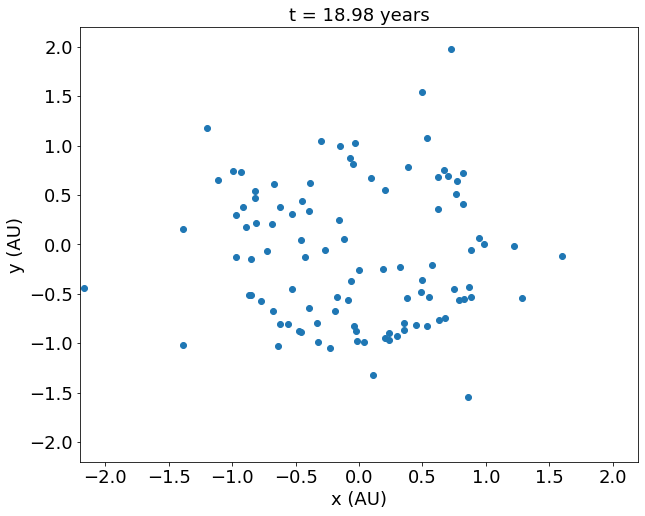

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

rev = nbody[0]
#for k in range(len(np.arange(0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7))):
x = rev[0,0]
y = rev[0,1]

#fig, ax= plt.subplots()
#line, = ax.plot(x, y)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,xlim=(-2.2,2.2),ylim=(-2.2,2.2))

plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
scatter=ax.scatter(x, y)

def update(num, x, y, scatter):
    #line.set_data(rev[int(num),0], rev[int(num),1])
    #line.axes.axis([-2, 2, -2, 2])
    x = rev[int(35*num),0]
    y=  rev[int(35*num),1]
    scatter.set_offsets(np.c_[x,y])
    plt.title('t = '+str(round(times[int(35*num)],2)) + ' years', fontsize=18)
    print(num)
    return scatter,

ani = animation.FuncAnimation(fig, update, 100, fargs=[x, y, scatter],
                              interval=10, blit=True)
ani.save('test.gif')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


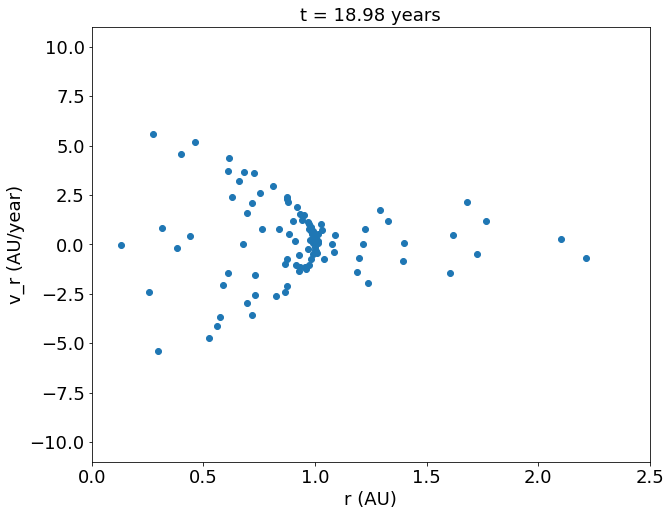

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x2 = rmags[0,0]
y2 = vmags[0,0]
#fig, ax= plt.subplots()
#line, = ax.plot(x, y)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,xlim=(0,2.5),ylim=(-11,11))

plt.xlabel('r (AU)',fontsize=18)
plt.ylabel('v_r (AU/year)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
scatter=ax.scatter(x2, y2)

def update(num, x2, y2, scatter):
    #line.set_data(rev[int(num),0], rev[int(num),1])
    #line.axes.axis([-2, 2, -2, 2])
    x2 = rmags[int(35*num),0]
    y2 = vmags[int(35*num),0]
    scatter.set_offsets(np.c_[x2,y2])
    plt.title('t = '+str(round(times[int(35*num)],2))+ ' years', fontsize=18)
    print(num)
    return scatter,

ani = animation.FuncAnimation(fig, update, 100, fargs=[x2, y2, scatter],
                              interval=10, blit=True)
ani.save('test.gif')
plt.show()

In [ ]:
nbody2 = leap_kdk(100,39.441,1.0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7,0.5)

In [ ]:
rev = nbody2[0]

vmags = nbody2[3]
rmags = nbody2[2]
pots=nbody2[6]

In [ ]:
print(rev[0,0])

In [ ]:

#fig, ax= plt.subplots()
#line, = ax.plot(x, y)

X=[]
Y=[]
X2=[]
Y2=[]
for counts in range(int(len(np.arange(0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7)))):
    x = rev[counts,0][0]
    y = rev[counts,1][0]
    X.append(x)
   
    Y.append(y)
    
    x2 = rev[counts,0][90]
    y2 = rev[counts,1][90]
    X2.append(x2)
   
    Y2.append(y2)

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,xlim=(-2,2),ylim=(-2,2))
plt.plot(X, Y,color='black',label='Particle 1')
plt.plot(X2, Y2,color='red',label='Particel 5')
plt.title('Motion of the particles ', fontsize=18)
plt.xlabel('x (AU)',fontsize=18)
plt.ylabel('y (AU)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)

    
plt.savefig('orbits.png')


plt.show()

In [ ]:
print(rmags[6,0][0])

In [ ]:

#fig, ax= plt.subplots()
#line, = ax.plot(x, y)


X=[]
Y=[]
X2=[]
Y2=[]
for counts in range(len(np.arange(0,5000*24*60*60/3.154e7,1*24*60*60/3.154e7))):
    x = rmags[counts,0][0]
    y = pots[counts,0][0]
    
    X.append(x)
    Y.append(y)
    x = rmags[counts,0][5]
    y = pots[counts,0][5]

    X2.append(x)
    Y2.append(y)

print(min(X))
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.plot(X, Y,label='Particle 1')
plt.plot(X2, Y2,label='Particle 5')
plt.title('Plummer potential ', fontsize=18)
plt.xlabel('r (AU)',fontsize=18)
plt.ylabel('Pot_eff ',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)

plt.savefig('plummer.png')

plt.show()